# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To supress warnings from new Python versions
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset

In [ ]:
# Giving Google Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file from Drive into Colab using read.csv function
df = pd.read_csv('/content/drive/MyDrive/PG Data Science and Business Analysis/Project 3: ReCell/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Viewing the first few rows of the data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Looking at the shape of the data
df.shape

(3454, 15)

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

**Observations:**
* The dataset has been loaded properly.
* It consists on 3454 rows and 15 columns as described in the data dictionary. Each column has information attributed to the cellphone. Phone information is provided in rows.
* There are no duplicates in the dataset.

In [ ]:
# Looking at the column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**
* There are 4 string (object type) columns and 11 numeric (float and int type) columns in the data.
* Not all columns have 3454 non-null values, we can infer that there are missing values in some columns.

In [ ]:
# Checking statistical summary of all columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations:**
* There are a total of 34 brands in the data with 502 being in the category 'others'.
* There are 4 different OS in the data. 3214 belong to Android, comprising around 93% of the total phones been Android.
* There is a big variance on screen size with the minimum size 5.08 and max 30.71. There is also ample variance in internal memory ranging from 0.01 to 1024 with a median of 32GB.
* 2335 out of 3454 phones have 4G, but only 152 have 5G.
* Considering the ample variance on battery, we can say that the mean and median are close together.
* Both used and new prices have close mean and median prices, we can imply a symmetrical distribution.

In [ ]:
# Checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:**
* There are missing values in many columns.
* We will explore the variables before treating missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, is performed in this part.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [ ]:
# Creating a function that combines boxplot and histogram for easier univariate EDA

def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Creating a function for labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Brand name

In [ ]:
df['brand_name'].nunique()

34

* There are a total of 34 different brand names in the data.

#### OS

In [ ]:
df['os'].value_counts(normalize=True)

os
Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: proportion, dtype: float64

* There are a total of 4 operating systems in the data. Android comprises around 93% of the total devices.
* Only 1% of the total devices belong to iOS.

#### Screen size (in cm)

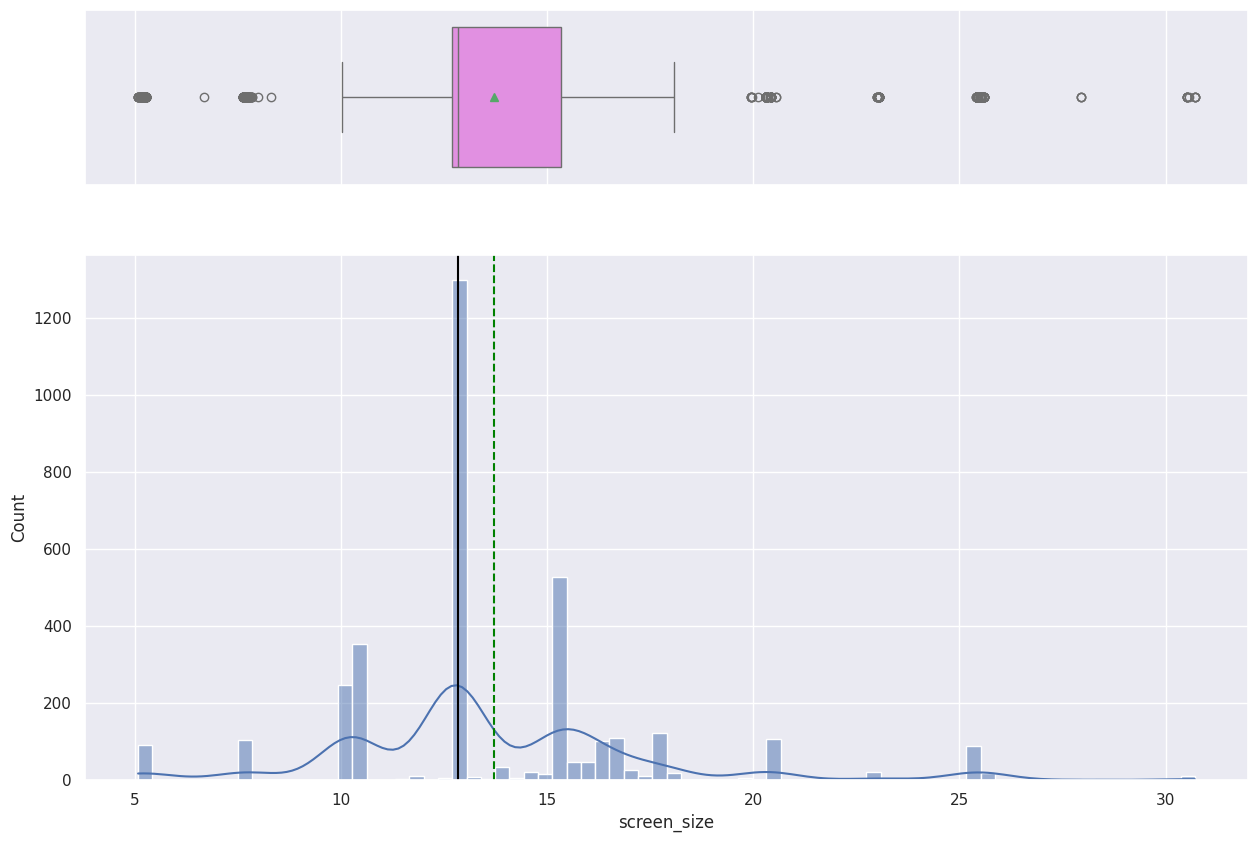

In [ ]:
histogram_boxplot(df, 'screen_size')

* The distribution of the screen size is right skewed. There are outliers on both ends in the boxplot.
* The mean size is slightly bigger than the median. The mode is about 13cm.

#### 4G

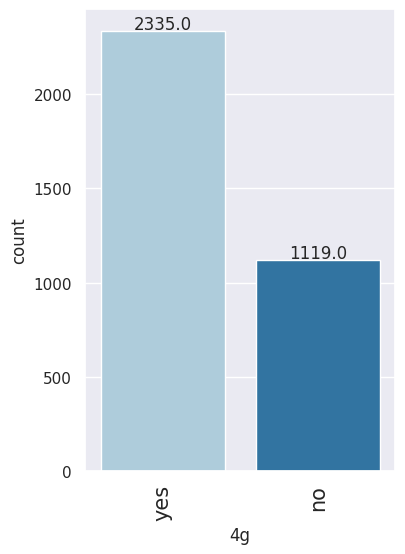

In [ ]:
labeled_barplot(df, '4g', perc=False)

* 2335 (67.6%) devices have 4G available while 1119 (32.4%) devices don't have 4G.

#### 5G

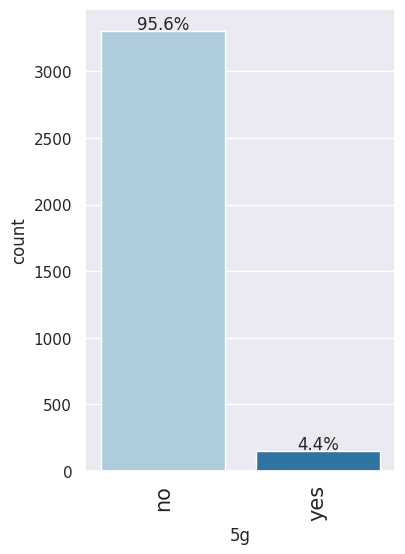

In [ ]:
labeled_barplot(df, '5g', perc=True);

* Only 4.4% of the devices have 5G available.

#### Main camera megapixels

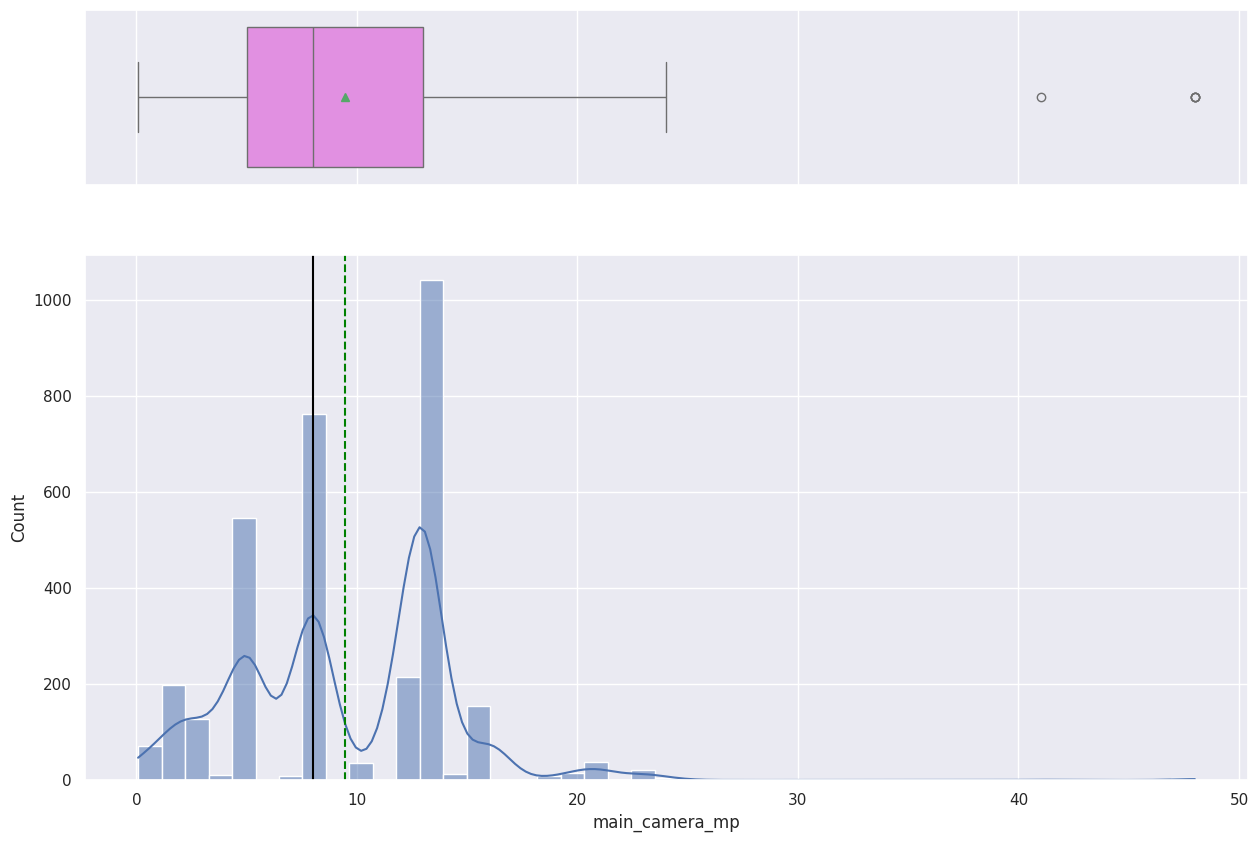

In [ ]:
histogram_boxplot(df, 'main_camera_mp')

* There are a few outliers on the upper side of the boxplot. The mean of megapixels for the devices is slightly higher than the median. The mode of resolution for the rear camera is about 13 megapixels which is higher than the mean.
* The distribution doesn't show any symmetry and is right skewed.

#### Selfie camera megapixels

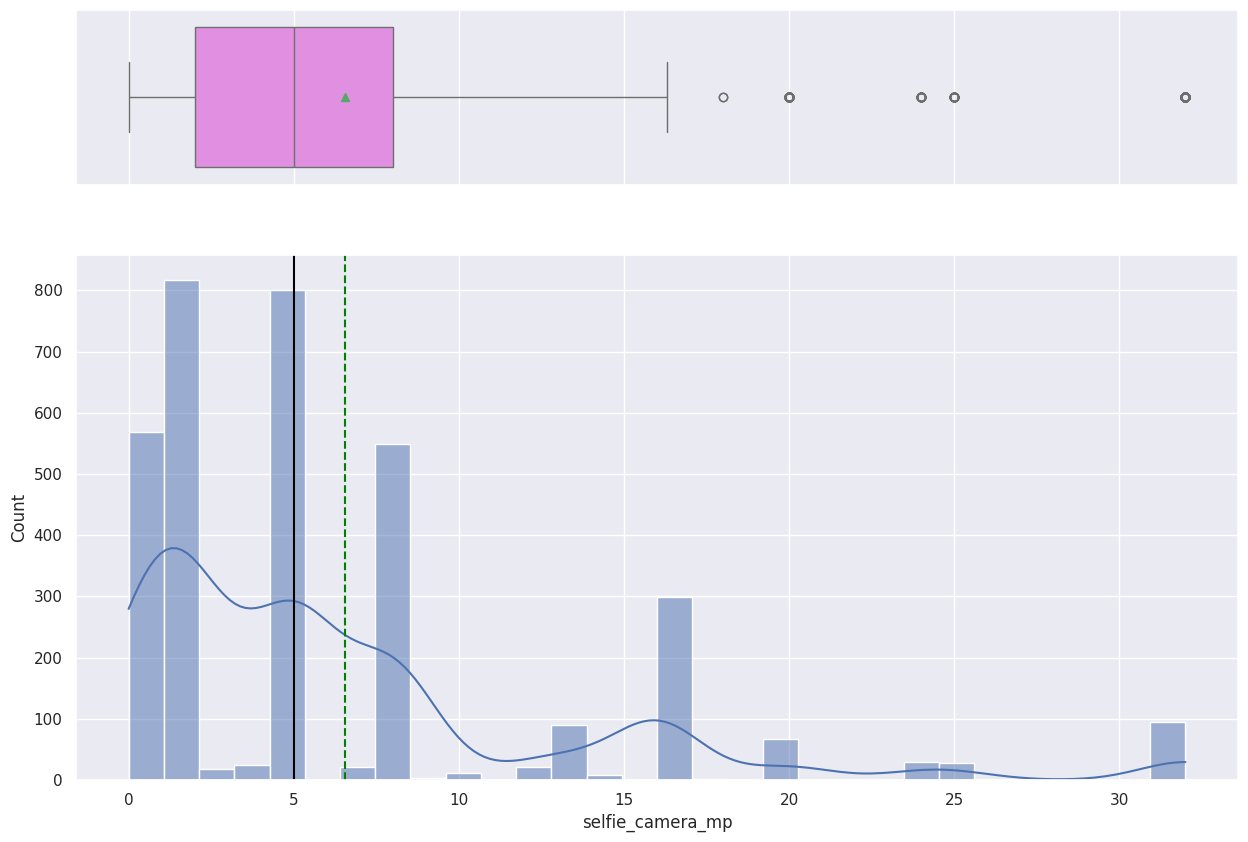

In [ ]:
histogram_boxplot(df,'selfie_camera_mp', bins=30)

* The distribution is heavily right skewed. There are many outliers on the right side of the boxplot.
* The mean is higher than the median.
* The mode is about 5 megapixels for the front camera and is the same as the median.
* Fewer devices have a resolution higher than 8MP for the front camera.

#### Internal memory

In [ ]:
df['int_memory'].value_counts()

int_memory
16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         18
0.10         17
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: count, dtype: int64

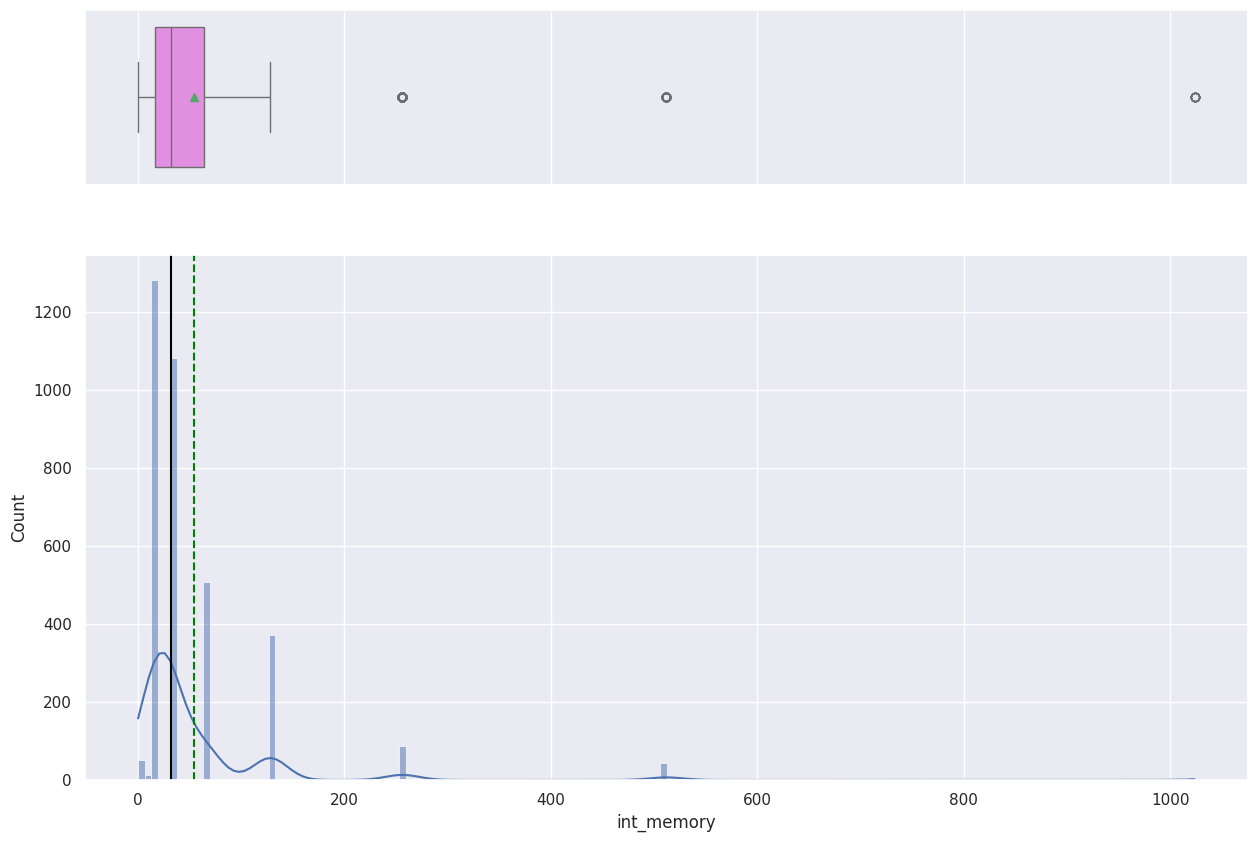

In [ ]:
histogram_boxplot(df, 'int_memory')

* There are a few outliers at 1024, 512, and 256 GB.
* The distribution is right skewed with mean higher than a median. The mode, at 16 GB, is lower than the mean and median.

#### RAM

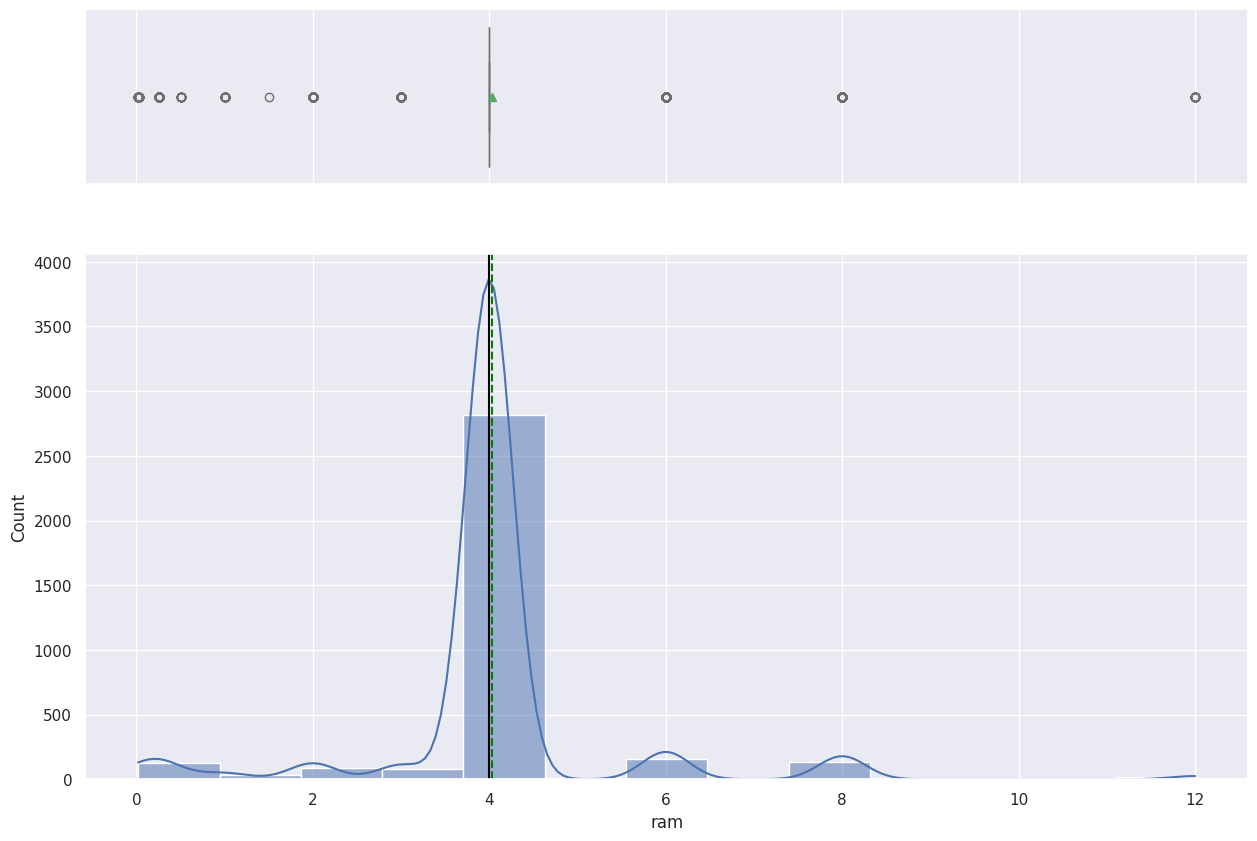

In [ ]:
histogram_boxplot(df, 'ram')

* The mean, median, and mode are about 4GB.
* There are a lot of outliers in this variable.
* Distribution is right skewed.

#### Battery

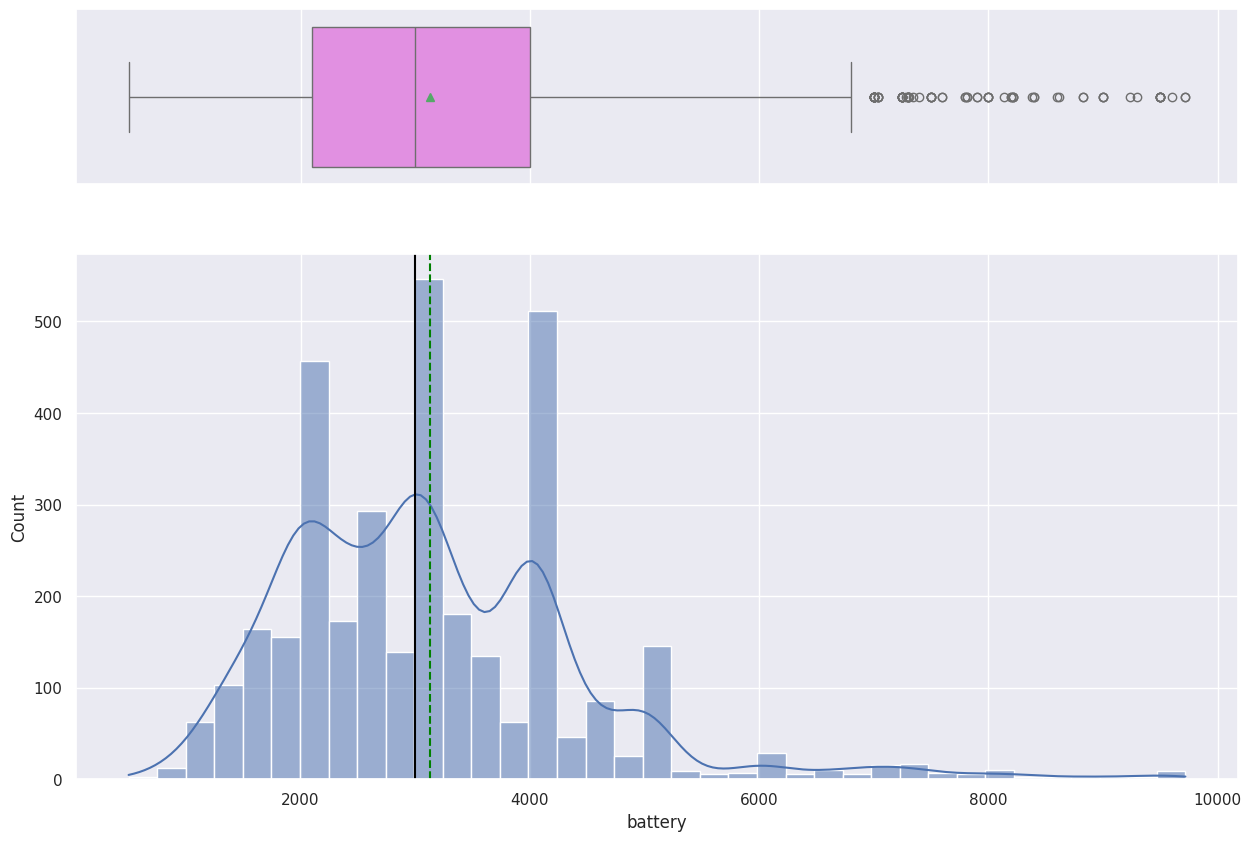

In [ ]:
histogram_boxplot(df, 'battery')

* The mean and median are close together at around 3000 mAh in energy capacity. The distribution is slightly right skewed.
* There are many outliers on the upper side.

#### Weight (in grams)

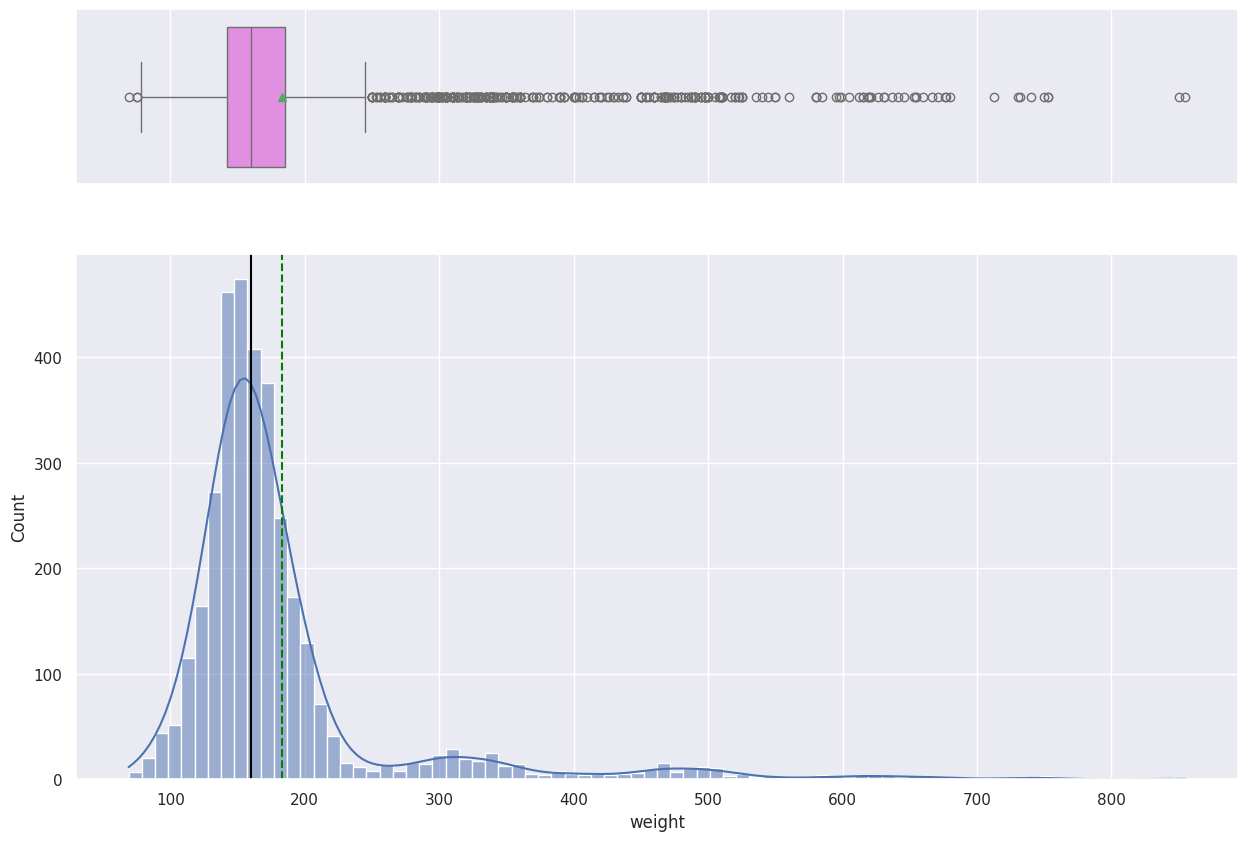

In [ ]:
histogram_boxplot(df, 'weight', bins=80)

* The distribution is heavily right skewed with many outliers on the upperside. Other than the outliers, the distribution would be somewhat symmetrical.
* The mean (at around 180 grams) is slightly higher than the median (at around 160 grams).
* 50% of the devices weight between 150 and 180 grams.

#### Realease year

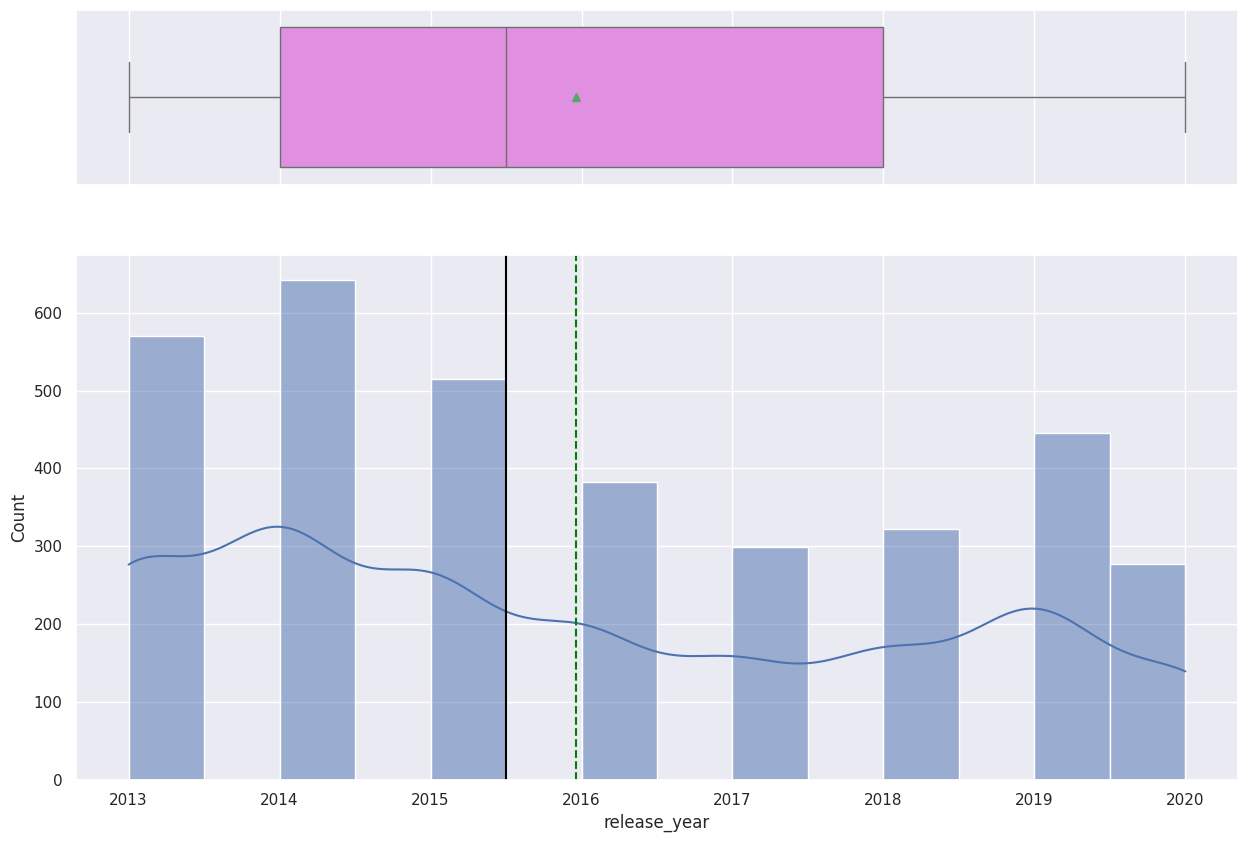

In [ ]:
histogram_boxplot(df, 'release_year')

* All devices are from betwwen 2013 and 2020.
* The mode is devices released in 2014, with a mean at almost 2016, and a median between 2015 and 2016.
* The distribution is right skewed, with 50% of the devices being from between 2014 and 2018.

#### Days used

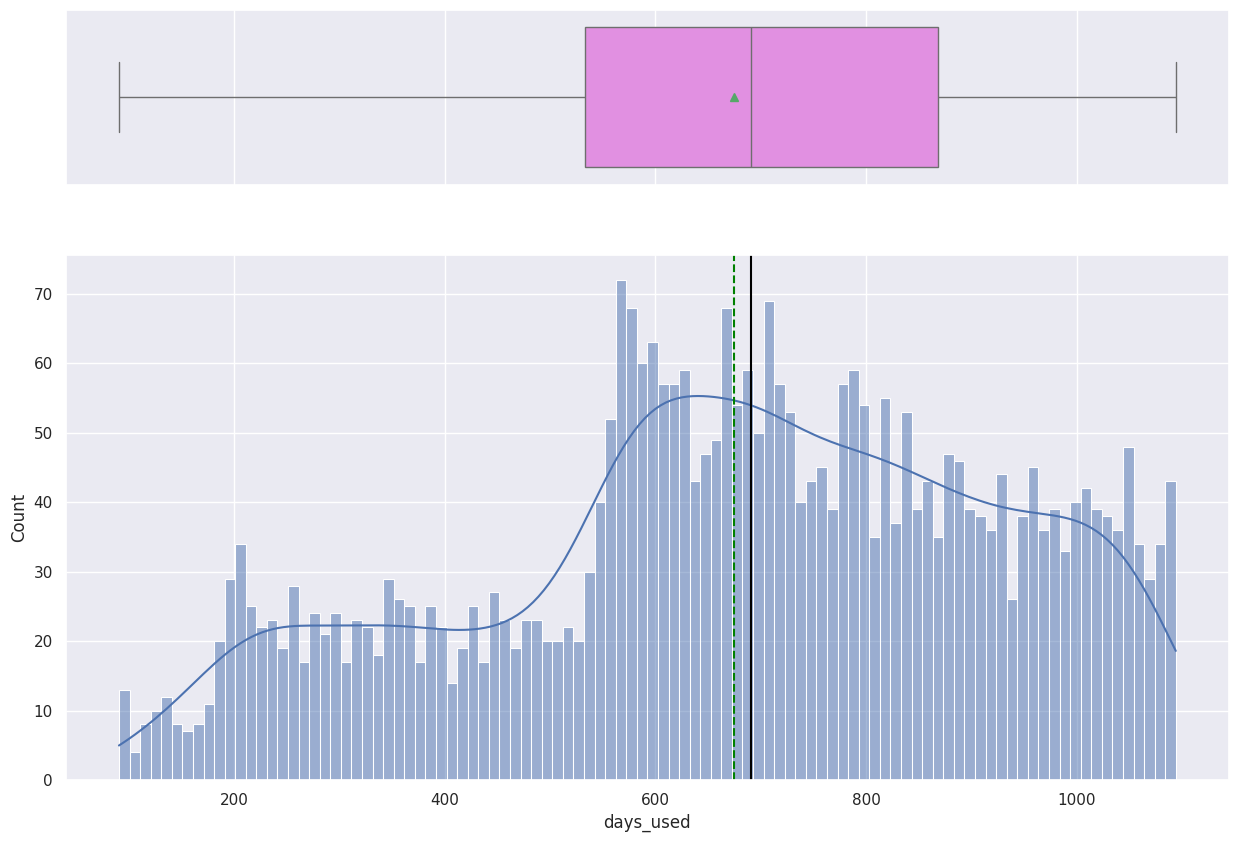

In [ ]:
histogram_boxplot(df, 'days_used', bins= 100)

* There are no outliers in the data. The mean and median are close together with a mode slightly lower.
* The distribution is left skewed.
* All devices have been used between around a 100 and 1100 days.

#### Normalized price of a new device (in euros)

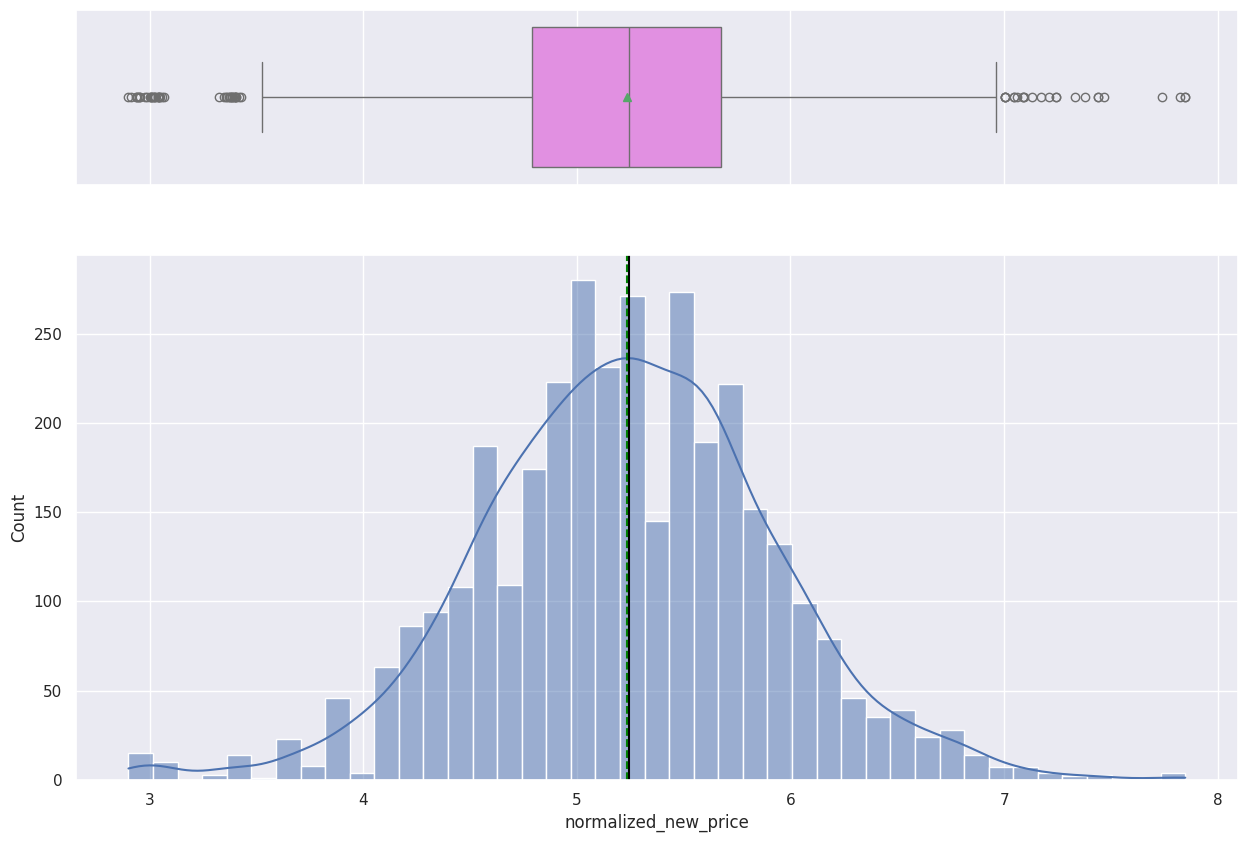

In [ ]:
histogram_boxplot(df, 'normalized_new_price')

* There are outliers on both ends of the boxplot.
* The distribution is close to normal but with a slightly longer tail on the lower side.

#### Normalized price of a used device

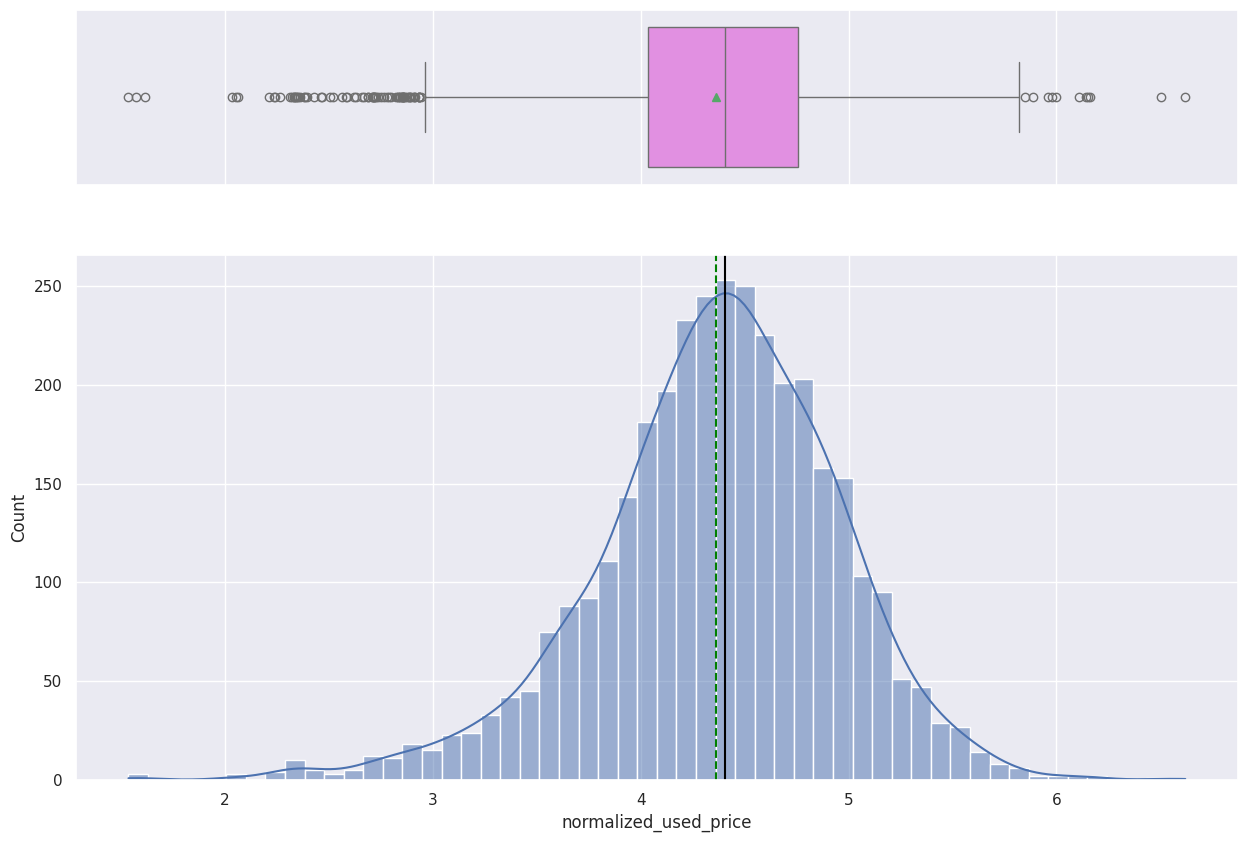

In [ ]:
histogram_boxplot(df,'normalized_used_price')

* There are many outliers on the data.
* The distribution is close to normal but with a longer left tail. The used price shows a longer left tail than the new price.

### Bivariate Analysis

#### Correlation check

In [ ]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Dropping release year from list of numerical columns as it is not numerical in nature
num_cols.remove('release_year')

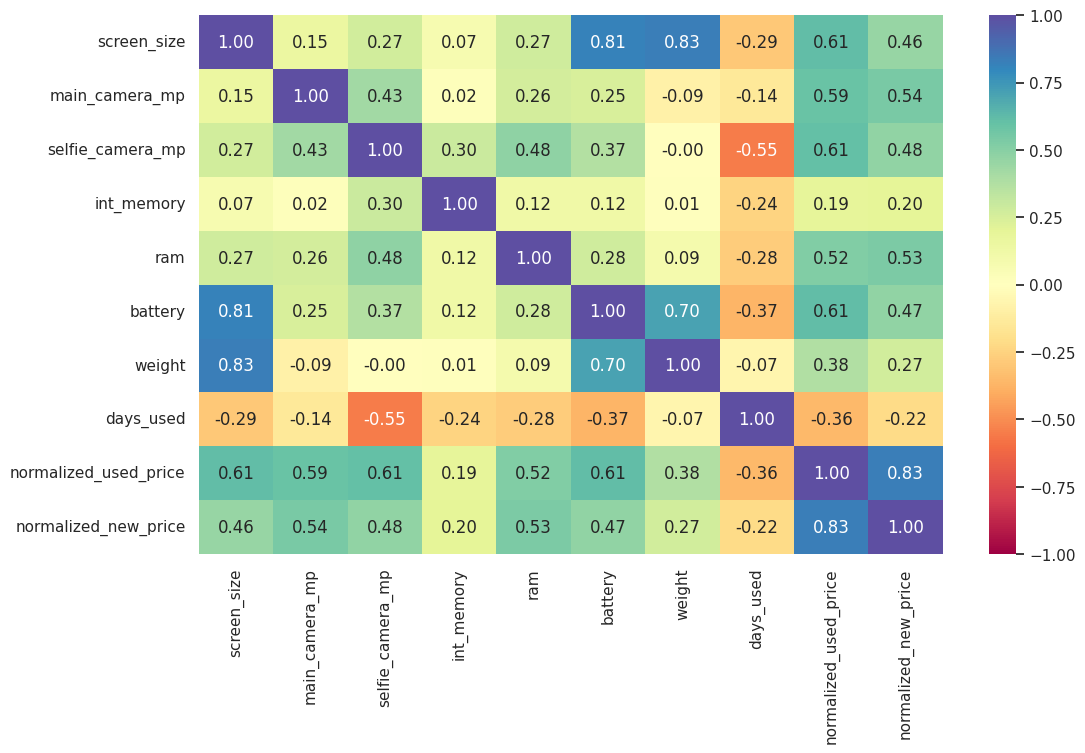

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Screen size is highly correlated with the weight and battery of the device. The bigger the screen, the more amount of battery is necessary and therefore the heavier the device.
* At the same time battery and weight are positively correlated.
* New and used price are have a heavy positive correlation.
* Used price is correlated with most numerical columns. We can assume that the price depends on all characteristics of the phone. Days used is the only aspect that has a negative correlation with price.

We will further analyze and visualize the relation between columns with high correlation.

#### Brand and RAM

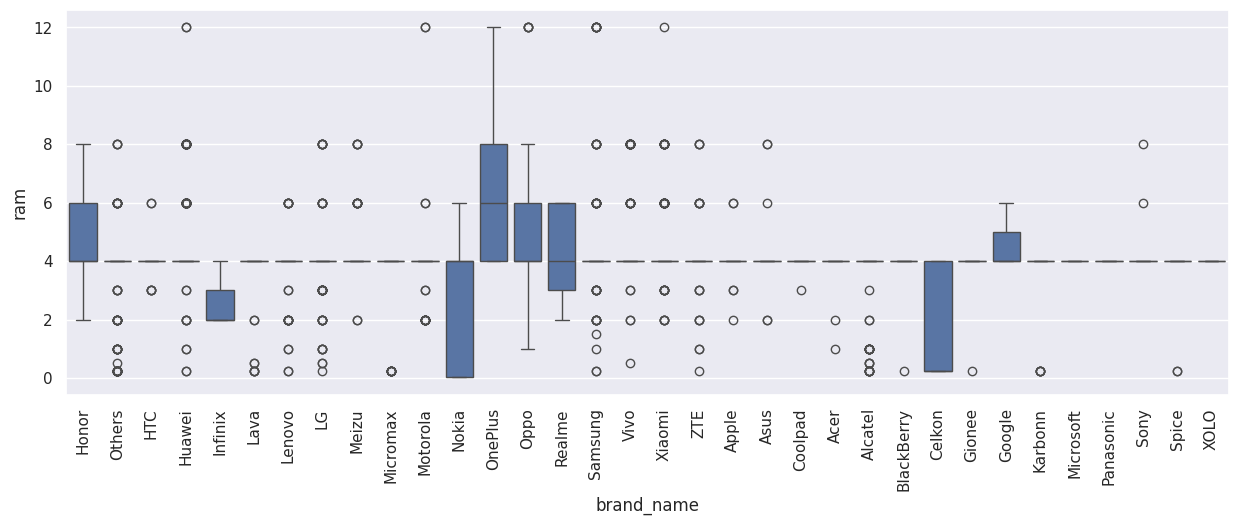

In [ ]:
# Checking the relation between brand of the device and RAM
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

The amount of RAM is important for the smooth functioning of a device
* Most brands have outliers on at least one end.
* OnePlus has higher ram in general.
* All Celkon's devices have between 0 and 4GB of RAM.

RAM often has an impact on the price of a device. Let's check the price of new and used devices based on RAM.

#### RAM and Price

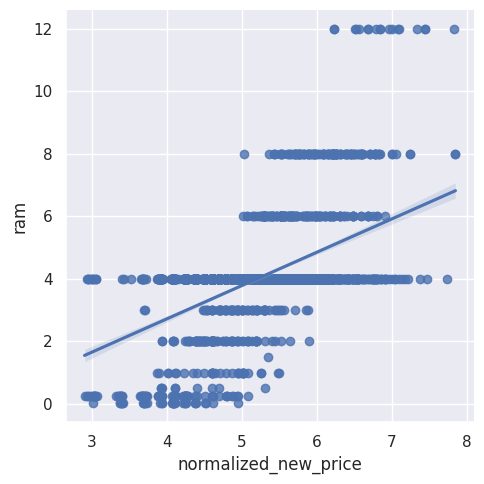

In [ ]:
# Visual of RAM and new price
sns.lmplot(data=df, x='normalized_new_price', y='ram');

* As observed in the Heatmap, there is a positive correlation between the normalized price of a new device and the amount of RAM.

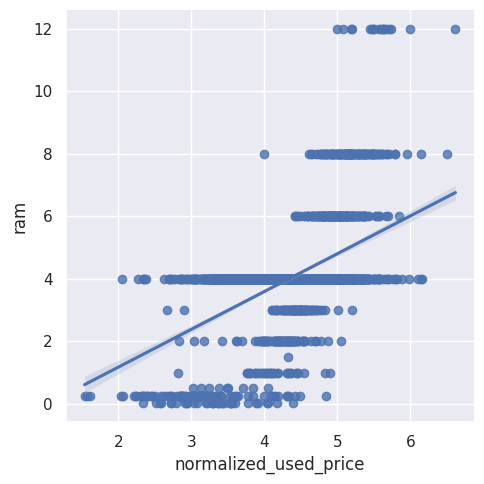

In [ ]:
# Visual of RAM and used price
sns.lmplot(data=df, x='normalized_used_price', y='ram');

* There is still a positive correlation between RAM and normalized used price of a device. The correlation is similar to the normalized new price, indicating the importance of RAM on new and used devices.

#### Battery and Weight

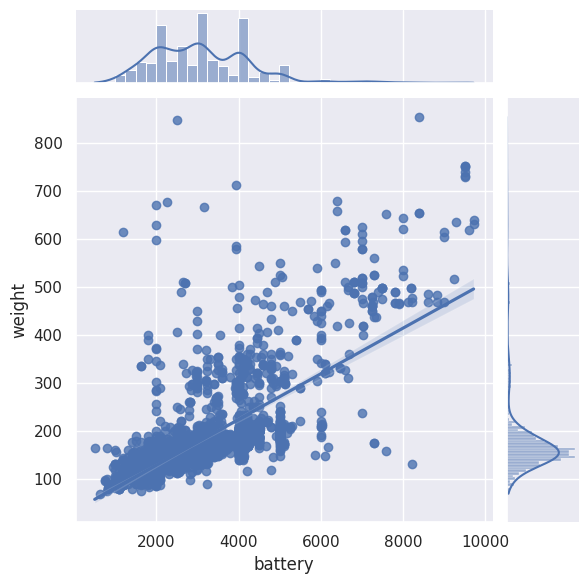

In [ ]:
# Visual of relationship between battery and weight
sns.jointplot(data=df, x='battery', y='weight', kind='reg');

* We knew there was positive correlation between battery size and weight of the device.
* There is a trend that, usually, the bigger the battery the heavier the device.

Let's see how the weight changes for batteries bigger than 4500 mAh.

In [ ]:
# Creating a new variable for batteries larger than 4500 mAh
large_battery = df[df.battery>4500]

# Checking the shape of the new dataset
print(large_battery.shape)

# Looking at the amount of brands that make devices with large batteries
print(large_battery['brand_name'].nunique())

# Checking the max and min weight of devices with large batteries
print(large_battery['weight'].min())
print(large_battery['weight'].max())

(341, 15)
25
118.0
855.0


* 341 out of the 3454 devices in the original dataset have a battery larger than 4500 mAh.
* 25 out of the 34 brands make devices with large batteries.
* The lightest device in the new dataset weighs 118 grams and the heaviest 855 grams.

Let's visualize how the weight of devices of at least 4500mAh varies by brand.

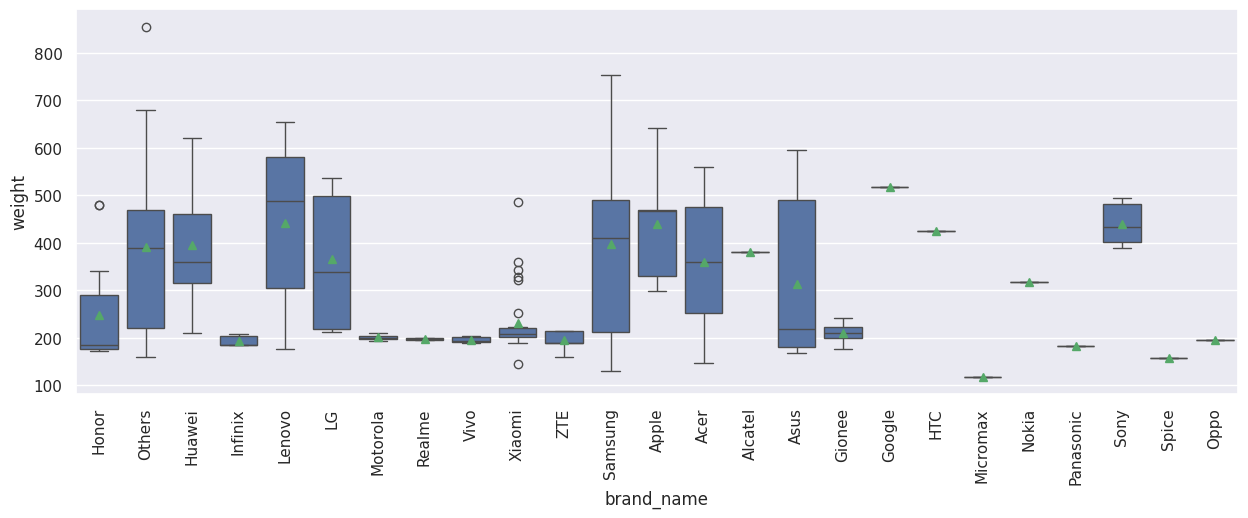

In [ ]:
# Visual of weight by brand name on large batteries
plt.figure(figsize=(15,5))
sns.boxplot(data=large_battery, x='brand_name', y='weight', showmeans=True)
plt.xticks(rotation=90)
plt.show()

* Samsung has a big variance on weight, ranging from a little over a 100 grams to almost 800.
* There are outliers for Xiaomi, Honor, and Others on the upper side.

Let's analyze the relation between all battery sizes and brands.

#### Battery and Brand

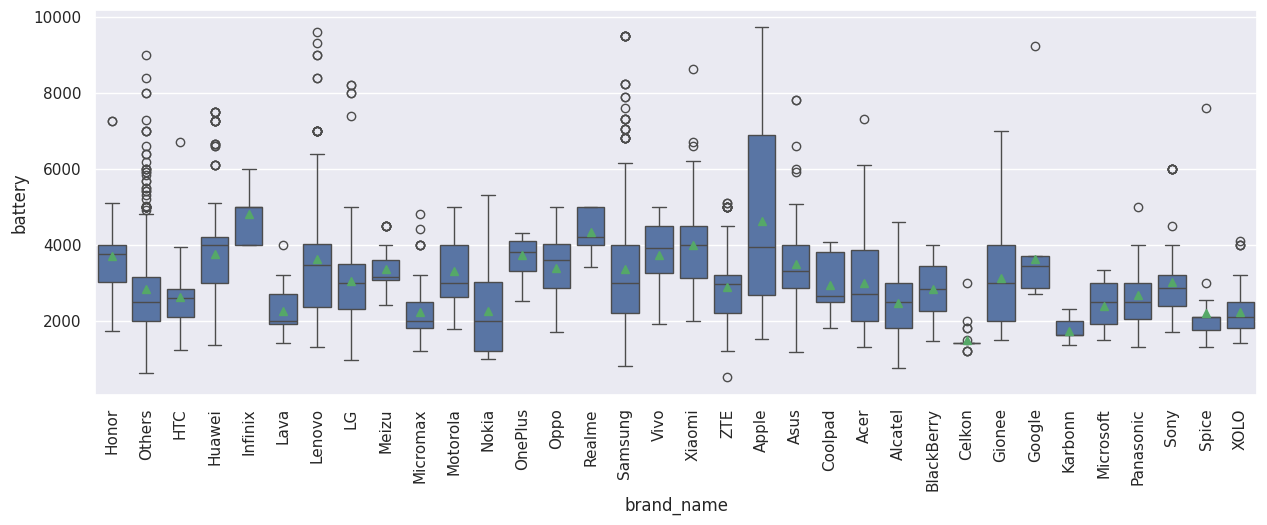

In [ ]:
# Visual of weight by brand name on all battery sizes
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='brand_name', y='battery', showmeans=True)
plt.xticks(rotation=90)
plt.show()

* Apple has no outliers. Overall, Apple has the largest batteries. Apple batteries range from less than 2000 to almost 10000 mAh with a median of 4000.
* Infinix has a small variance with battery sizes from 4000 to 6000 and no outliers.
* Celkon and Karbornn have the smallest batteries overall.

#### Screen size (in cm) and Brand

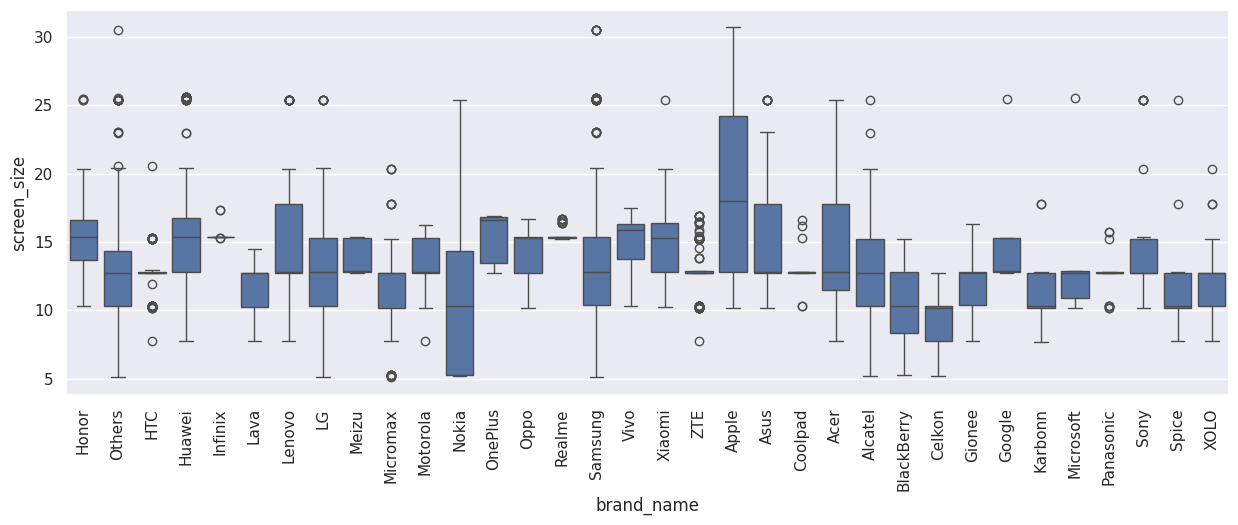

In [ ]:
# Visual of screen sizes by brand
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='brand_name', y='screen_size')
plt.xticks(rotation=90)
plt.show()

* Most brands have outliers for screen size.
* All Nokia devices are between 5 and 25 centimeters.
* Apple devices range from 10 to 30 cms and has no outliers. It seems to have the largest devices overall.

In [ ]:
# Creating a new dataset for devices with screen sizes larger than 6cm
large_screen = df[df.screen_size>6]

# Checking the shape of the new dataset
print(large_screen.shape)

# Checking the amount of brands with large screens
print(large_screen['brand_name'].nunique())

# Looking at the max and min weight of devices with large screens
print(large_screen['weight'].min())
print(large_screen['weight'].max())

# Looking at the max and min battery of devices with large screens
print(large_screen['battery'].min())
print(large_screen['battery'].max())

(3362, 15)
34
75.0
855.0
500.0
9720.0


* All brands make devices with of at least 6 cm.
* 3362 out of the 3454 devices are at least 6 cm.
* Weight and battery are important factors for entertainment, but there is a big variance in both variables.

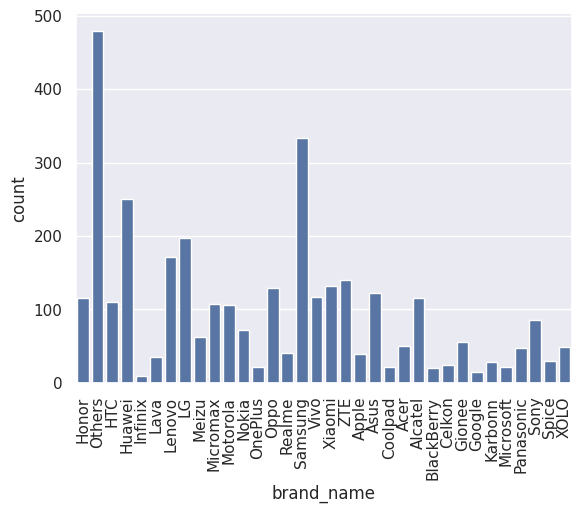

In [ ]:
sns.countplot(data=large_screen, x='brand_name')
plt.xticks(rotation=90);

* Others make most of the phones with large screens, comprising almost 500 of the total.
* Samsung makes over 300 devices with large screens.
* Google and Infinix make the least amount of devices with large screens.

#### Selfie cameras and Brand

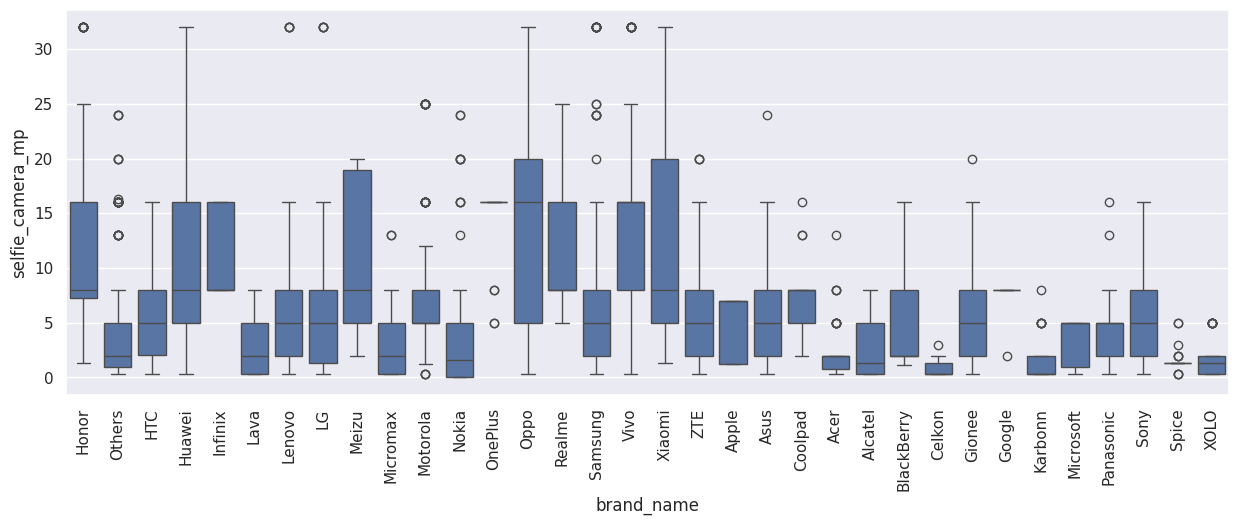

In [ ]:
# Visual between resolution of front camera and brand
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

* Celkon has the smallest resolution overall with all devices having less than 5 megapixels.
* Google devices have around 8MP with one outlier on around 2.
* Xiaomi has the highest resolution overall with between 1 and 32 MP.
* However, Oppo has a much higher median than Xiaomi.

Let's check what brands have a selfie camera MP higher than 8.

In [ ]:
# Creating a new dataset with larger selfie cameras
large_selfie_camera = df[df.selfie_camera_mp > 8]

# Checking the shape of the new dataset
print(large_selfie_camera.shape)

# Checking how many brands make selfie cameras larger than 8 MP
print(large_selfie_camera['brand_name'].nunique())

(655, 15)
25


* 655 out of the total 3454 devices have a selfie camera larger than 8MP.
* 25 out of the 34 brands make devices with higher resolution on the front camera.

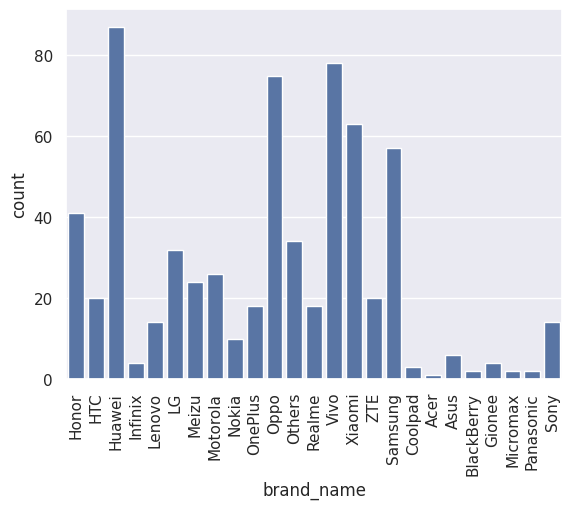

In [ ]:
# Visual of amount of devices with large selfie cameras
sns.countplot(data=large_selfie_camera,x='brand_name')
plt.xticks(rotation=90)
plt.show()

* Huawei, Vivo, and Oppo make the most amount of devices with large selfie camera resolution.

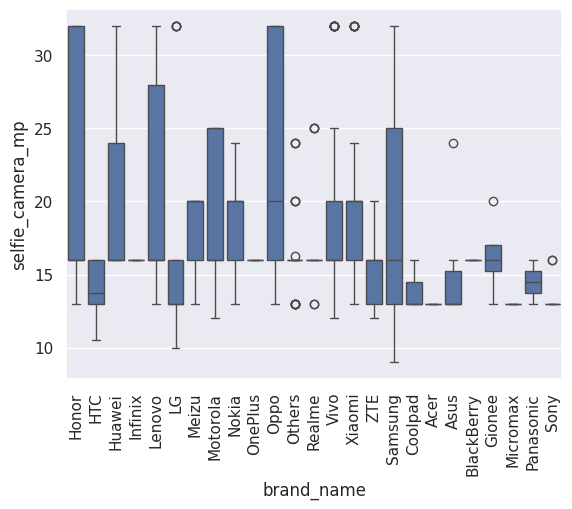

In [ ]:
# Visual of brands that make devices with large selfie cameras
sns.boxplot(data=large_selfie_camera, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

* Overall, Honor and Oppo have devices with higher selfie camera resolution. Oppo has a higher median than Honor.
* Acer has the lowest and least amount of variance for devices with high selfie camera resolution.

Let's check if these observations are similar for the main camera resolution.

#### Main camera and Brand

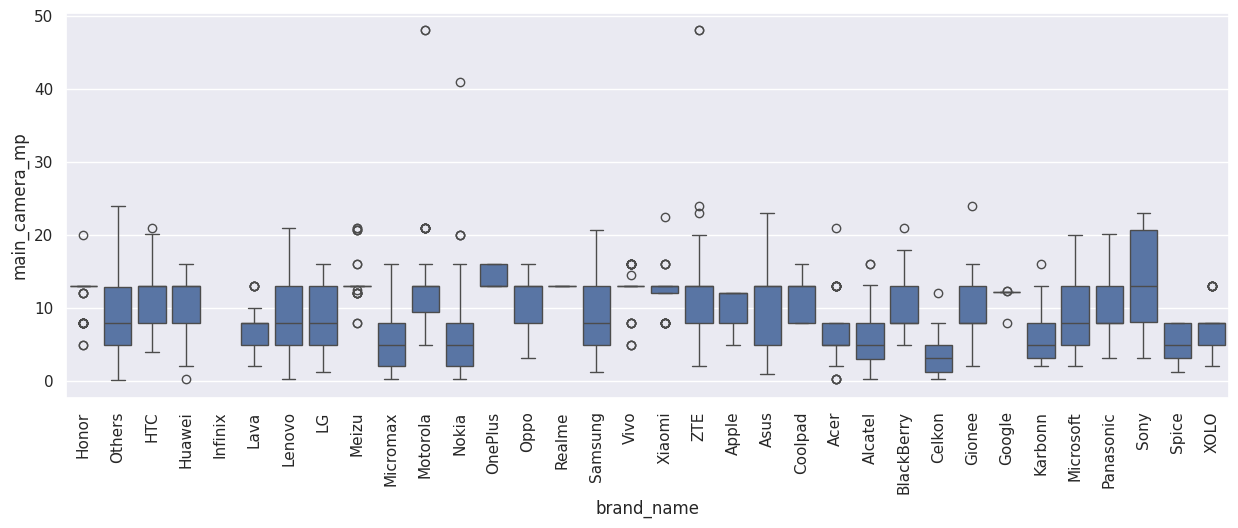

In [ ]:
# Visual between main camera resolution and brand name
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='brand_name', y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

* Celkon continues to have low resolution for the main camera as well.
* Sony has a big variance (around 5 to 25) but also a higher median than most.
* All OnePlus devices have a main camera resolution between 12 and 18MP.

We will analyze brands with a main camera MP of 13 since that is the upper quartile mark.

In [ ]:
# Creating a new dataset with larger main cameras
large_main_camera = df[df.main_camera_mp > 13]

# Checking the shape of the new dataset
print(large_main_camera.shape)

# Checking how many brands make selfie cameras larger than 8 MP
print(large_main_camera['brand_name'].nunique())

(267, 15)
26


* 267 devices out of the 3454 have a rear camera resolution higher than 13 MP. Comprising less than 8% of the total devices.
* 26 out of the 34 brands make at least one device with a resolution of 13MP.

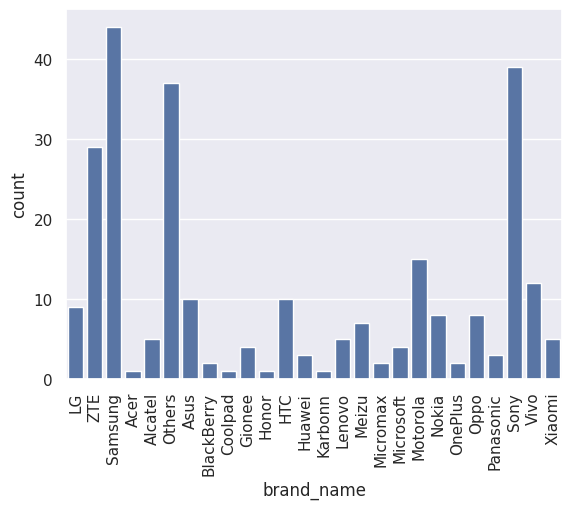

In [ ]:
# Visual of amount of devices with large main cameras
sns.countplot(data=large_main_camera,x='brand_name')
plt.xticks(rotation=90)
plt.show()

* Samsung, Sony, and Others are the leading brands on large rear camera resolution.

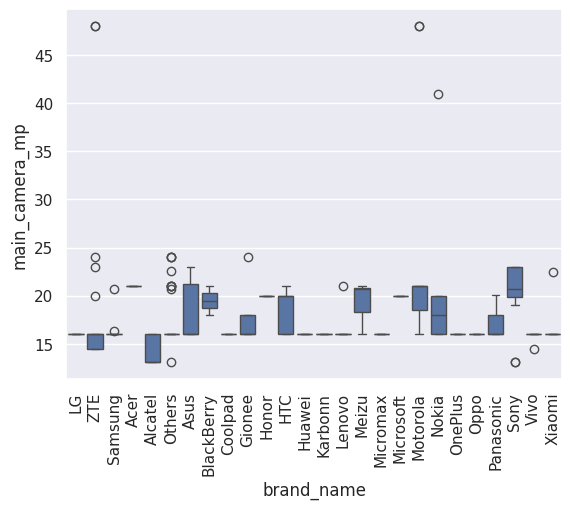

In [ ]:
# Visual of brands that make devices with large main cameras
sns.boxplot(data=large_main_camera, x='brand_name', y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

* Overall, variances are smaller than in selfie cameras. However there a many outliers on the upper sides.
* Sony is still on the lead with one outlier on the lower side and all devices having between 18 and 23 MP.

#### Release year and Prices

Let's see how prices vary throughout the years. We start by looking at the price of new devices and then comparing to used devices.

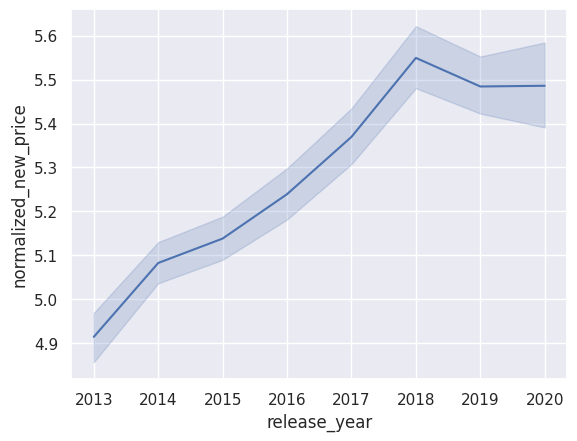

In [ ]:
# Visual of new devices and years. We use lineplots for data that evolves over time
sns.lineplot(data=df,x='release_year', y='normalized_new_price');

* The confidence interval increases over time.
* Price of new devices has clearly increased over time. There is a spike in 2018 where it increased to 5.55. In 2019 the price decreased slightly to around 5.5.

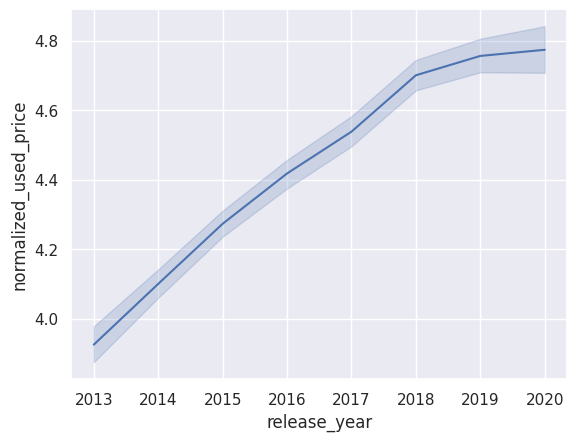

In [ ]:
# Visual of used devices and years
sns.lineplot(data=df,x='release_year', y='normalized_used_price');

* The price of used devices has progressively increased through the years.
* We see that normalized used prices is slightly below new prices.

#### Used price and 4G or 5G

Let's check how 4G and 5G affect the price of a used device.

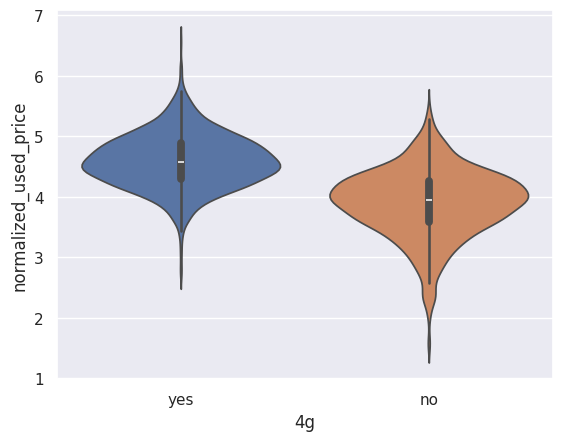

In [ ]:
# Visual of used price and 4G
sns.violinplot(data=df, x='4g', y='normalized_used_price', hue='4g');

* Price increases with the availability of 4G.
* Median normalized price of devices with 4G is around 4.5, while the median of devices with no 4G is around 4 euros.

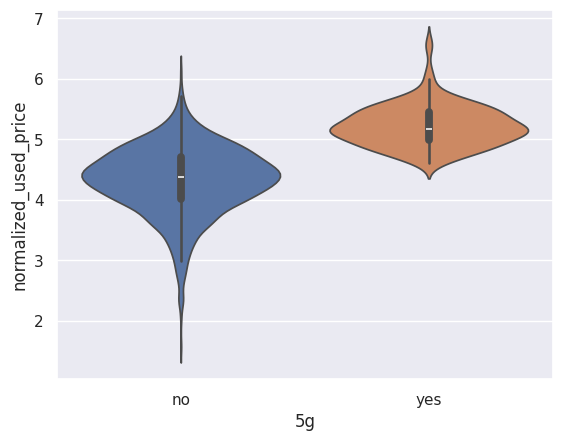

In [ ]:
# Visual of used price and 5G
sns.violinplot(data=df, x='5g', y='normalized_used_price', hue='5g');

* The median price of devices that offer 5G is higher than those with no 5G and higher than devices that offer 4G.
* The median normalized price in euros of devices that have 5G is slightly above 5. While devices with no 5G is around 4.5, similar to those devices that offer 4G.

#### Release year and 5G

Let's take a look at devices with 5G

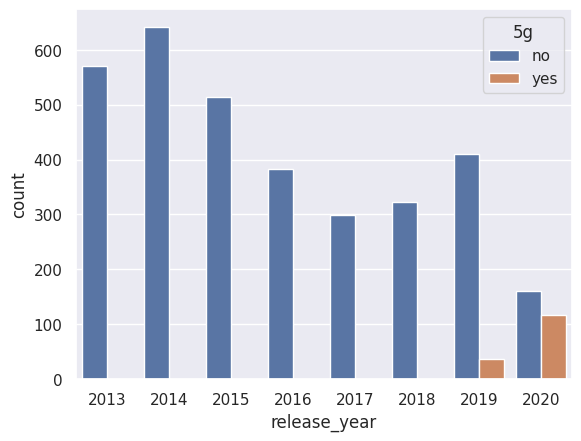

In [ ]:
sns.countplot(data=df, x='release_year', hue='5g');

* 5G first came out in 2018 and didn't propoerly get underway until 2019.
* All devices with 5G are from 2019 and 2020. Most of them being from 2020.
* A total of 152 out of 3454 of the devices have 5G. This can cause our data to be skewed and we need to consider this factor.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# Creating a copy of the data to avoid changes to it
df1 = df.copy()

* We will inpute the missing values in each column with median grouped with release year and brand name.
* The data has many outliers and is heavily skewed. Using the median to fill in missing values is an appropriate measure of central tendency.

In [ ]:
# Checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Treating missing values
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(value=df1.groupby(['release_year', 'brand_name'])['selfie_camera_mp'].transform('median'))
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value=df1.groupby(['release_year', 'brand_name'])['main_camera_mp'].transform('median'))
df1['int_memory'] = df1['int_memory'].fillna(value=df1.groupby(['release_year', 'brand_name'])['int_memory'].transform("median"))
df1['ram'] = df1['ram'].fillna(value=df1.groupby(['release_year', 'brand_name'])['ram'].transform('median'))
df1['battery'] = df1['battery'].fillna(value=df1.groupby(['release_year','brand_name'])['battery'].transform('median'))
df1['weight'] = df1['weight'].fillna(value=df1.groupby(['release_year', 'brand_name'])['weight'].transform('median'))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Treating the rest of missing values with the median by brand
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value=df1.groupby(['brand_name'])['main_camera_mp'].transform('median'))
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(value=df1.groupby(['brand_name'])['selfie_camera_mp'].transform('median'))
df1['battery'] = df1['battery'].fillna(value=df1.groupby(['brand_name'])['battery'].transform('median'))
df1['weight'] = df1['weight'].fillna(value=df1.groupby(['brand_name'])['weight'].transform('median'))

df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Treating the remaing missing values for main camera mp with the median of the column
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value=df1['main_camera_mp'].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* All missing values have been treated.

### Feature Engineering

In [ ]:
# Checking the newest year for the devices
df1['release_year'].max()

2020

* Considering 2020 as the newest release year, we will use 2021 as reference to then drop the column release year. As described in the data description, the data was collected in the year 2021.

In [ ]:
# Creating a column 'years_out' from 'release_year' column
df1['years_out'] = 2021 - df1['release_year']
df1.drop(['release_year'], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_out
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


* A new column, years_out, has been added at the end of the dataset.
* Release_year column has been dropped.

In [ ]:
df1['years_out'].describe()

* 50% of the used devices in the data were originally released five and half years ago.

### Outlier detection and treatment

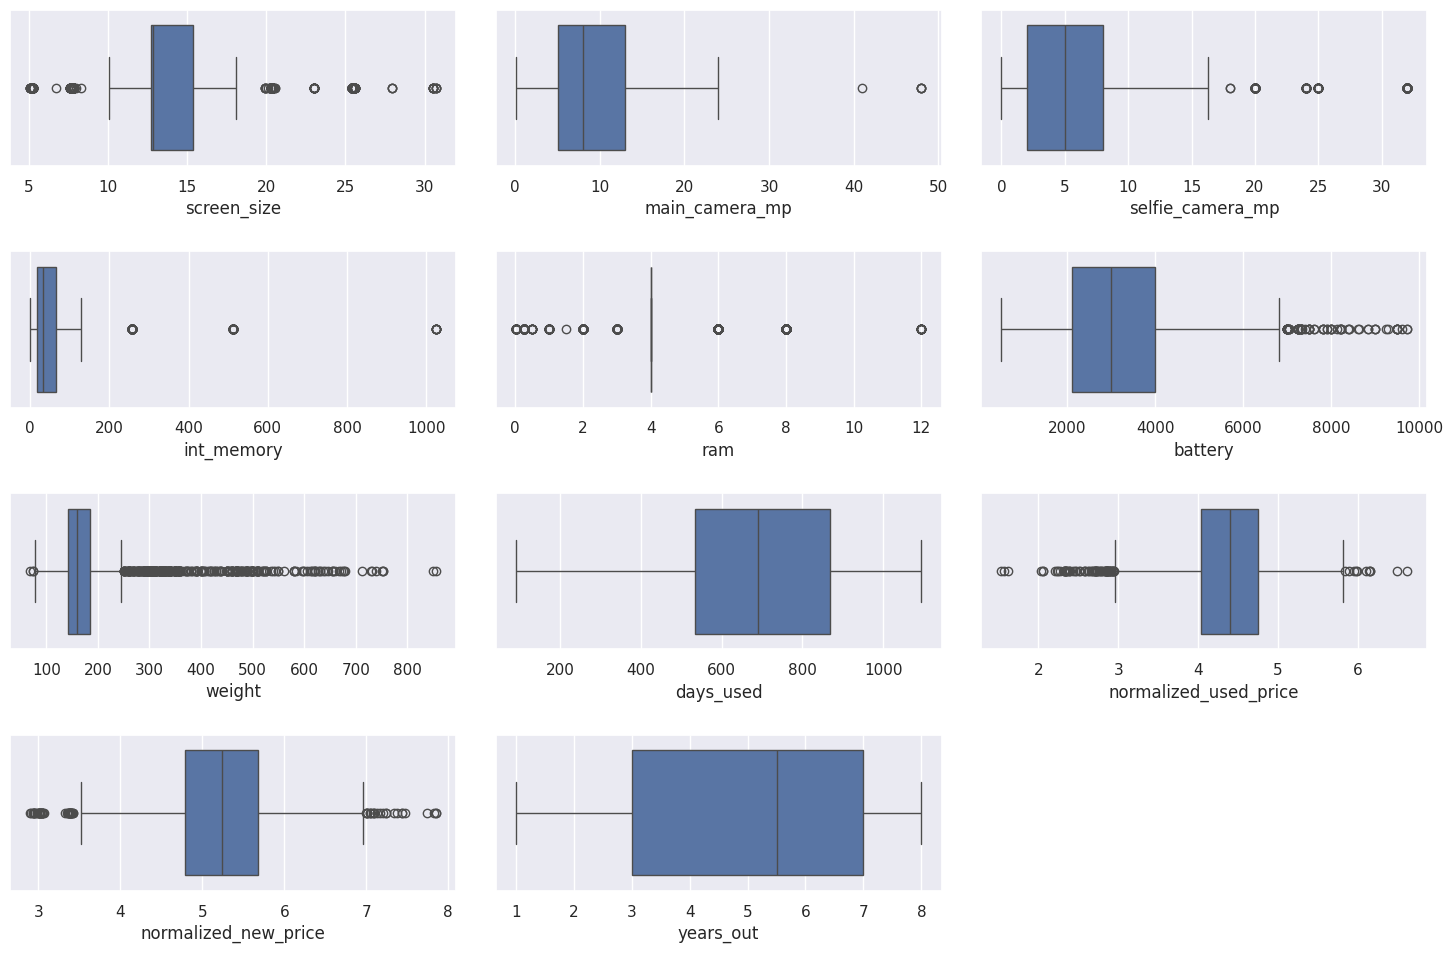

In [ ]:
# Outlier detection using boxplots
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are many outliers in the data. However, they are all proper values in the data and we will not treat them.

### Preparing data for for modeling

* We want to predict the price for used and refurbished devices.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.
* We'll build a Linear Regression model using the train data and then check it's performace.

In [ ]:
# Defining X (independent) and y (dependent) variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_out  
0              4.715100          1  
1              5.519018          1  
2              5.884631          1  
3              5.630961          1  
4              4.9478

In [ ]:
# Add the intercept or constant term to the data
X = sm.add_constant(X)

In [ ]:
# Creating dummy variables
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print('Number of rows in train data =', X_train.shape[0])
print('Number of rows in test data =', X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- We will explore the data once again after manipulating it.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_out              3454 non-null   int64  
dtypes: f

* Column types remain the same as in the original dataset.
* There are no non-null values left. We can check that all missing values were inputted.

In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


* All columns have 3454 values entered.
* There is a slight variation on mean and standard deviation for the columns that had missing values treated ('main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', and 'weight').
* Even after value treatment, the mean and standard deviation changes are not significant and we can assume that the data is not drastically impacted.
* We will not visualize the modified data again since those changes are not drastic.

## Model Building - Linear Regression

In [ ]:
# Make the linear model using statsmodels OLS and print the model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                           10:57:08   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Interpreting the Regression Results

1. **Adjusted R-squared** Reflects the fit of the model. In this case the value for Adjusted R-squared is 0.842, meaning that the model can explain 84.2% of the variance in the training set.
2. **Constant coefficient** is the Y-intercept. In our case the value is 1.3156.
3. **Coefficient of a predictor variable** represent the change in the output Y due to a change in the predictor variable (everything else held constant). However, when we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.
4. **Std err** reflects the level or accuracy of the coefficients. The lower it is, the higher is the level of accuracy.
5. **P>|t|** is the p-value. It gives the p-value for each independent feature to check the null hypothesis(independent feature is not significant). A p-value of less than 0.05 is considered to be statistically significant.
6. **Confidence interval** represents the range in which our coefficients are likely to fall with a likelihood of 95%.

## Model Performance Check

We check the performace of the model using different metrics defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a fuction to calculate MAPE (mean absolute percentage error) and adjusted $R^2$.
* We create a function that will print all these metrics.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


* R-squared in the training set is 0.84 so the model is not underfitting.
* Train and test RMSE and MAE are similar, so the model is not overfitting.
* The model can predict used prices with a mean error of 0.18.
* The model is able to predict 4.5% of the used device prices.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
We will be checking the following assumptions:
1. No multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heteroscedasticity

### Test for multicollinearity

We will test for multicollinearity using VIF.
* If VIF is 1 then there is no correlation between $k$th predictor and the remaining predictor variables
* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# Defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# Checking the VIF of the predictors
checking_vif(X_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are a few columns with high VIF values.
* We will drop numerical columns with VIF > 5 one by one.
* We ignore the VIF values for dummy variables and the intercept.

#### Removing multicollinearity

In [ ]:
# Creating a function to check the effect of dropping high VIF columns
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# Observing the effect of dropping the column 'screen_size'
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


We will remove 'screen_size' column first since it has a higher VIF value.

In [ ]:
col_to_drop = 'screen_size'
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_out,4.730315


* All VIF values are lower than 5. We have dealt with multicollinearity in the data.

Let's rebuild the model using the updated set of predictors variables.

In [ ]:
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                           10:57:10   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* Adjusted R-squared dropped from 0.842 to 0.838, showing that the dropped column did not have much effect on the model.
* Multicollinearity has been dealt with since all VIF values are lower than 5..

We can now look at the p-values of predictor variables to check their significance.

#### Dealing with high p-value variables

* We will drop predictor variables tha thave a p-value greater than 0.05 as they do not significantly impact the target variable
* We will drop variables one by one as p-values can change after dropping a variable.
* We start by dropping the column with the highest p-value.

In [ ]:
# Initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set. Creating an auxiliary dataset
    X_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_out', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
# Building a new model without high p-values
olsmod_2 = sm.OLS(y_train, X_train3).fit()
print(olsmod_2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                           10:57:10   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod_2_train_perf = model_performance_regression(olsmod_2, X_train3, y_train)
olsmod_2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod_2_test_perf = model_performance_regression(olsmod_2, X_test3, y_test)
olsmod_2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* All p-values are lower than 0.05.
* Dropping high p-values has not drastically impacted the model performance. This shows that these variables don't significantly impact the target variable.
* The model is able to explain almost 84% of the variance.
* RMSE and MAE are comparable for train and test sets indicating that the model is not overfitting.

We'll check the rest of assumptions using olsmod_2.

### Test for linearity and independence

* We will test these assumptions by making a plot of fitted values vs residuals and checking for patterns.
* If there is no pattern, residuals are independent and the model is linear. Otherwise, the model shows signs of non-linearity and residuals are not independent.

In [ ]:
# Creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod_2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod_2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


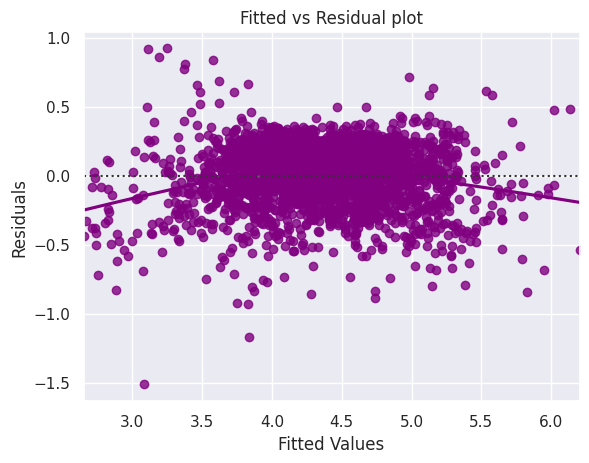

In [ ]:
# Plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatterplot shows the distribution of residuals (errors) vs fitted values (predicted).
* We see no pattern in the plot above. The assumptions of linearity and independence are satisfied.

### Test for normality

* We check for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and using the Shapiro-Wilk test.
* If the residuals follow a normal distribution, they will make a straight line plot.
* If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

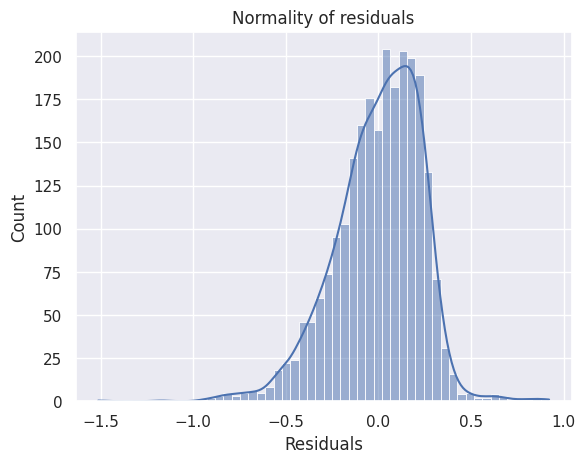

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals almost has a bell shape structure.

Let's check the Q-Q plot.

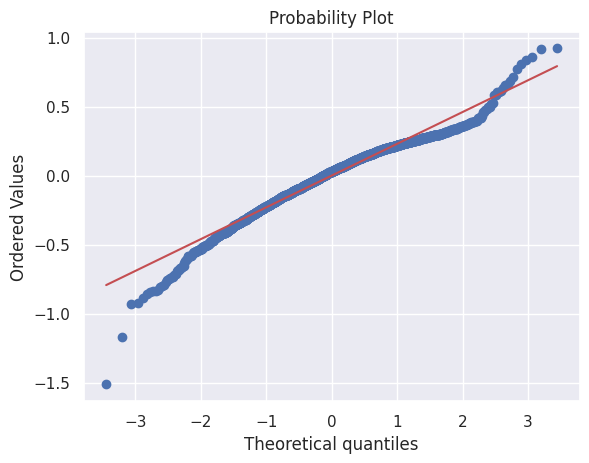

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals almost follow a straight line.

Let's check with Shapiro-Wilk's test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

* Since the p-value is lower than 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* As an approximation, we can consider the distribution to be close to normal. So, the assumpion is satisfied.

### Test for homoscedasticity

* We test for homoscedasticity by using the goldfeldquandt test and a plot of residual vs. fitted values.
* If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic.
* In the case of any non-symmetrical shape, the residuals are heteroscedastic.

In [ ]:
# Importing the necessary libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic.
* So, this assumption is satisfied.

## Predictions on test data

In [ ]:
# predictions on the test set
pred = olsmod_2.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


* We observe that actual and predicted values are comparable. We see that our model has good prediction results.

## Final Model

In [ ]:
# Recreating the final model
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [ ]:
# Print the final model summary
olsmod_final = sm.OLS(y_train, X_train_final).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                           10:57:12   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod_final_train_perf = model_performance_regression(
    olsmod_final, X_train_final, y_train
)
olsmod_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod_final_test_perf = model_performance_regression(
    olsmod_final, X_test_final, y_test
)
olsmod_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**
* The model is able to explain almost 84% of the variance.
* The train and test RMSE and MAE are low and comparable. Our model is not overfitting.
* MAPE on the test suggest that it can predict within 4.56% of the normalized used price.
* A unit increase in normalized new price will result in a 0.4415 unit increase in the normalized used price, all other variables remaining constant.
* If the number of years a device has been out increases, then its value decreases by 0.0292 units, all other variables held constant.
* A device that has 4G available, then the normalized used price increases by 0.0502.
* However, if the device has 5G, then the normalized used price decreases by 0.0673, all other variables held constant.
* A unit increase in the resolution of the rear camera (main_camera_mp) will result in a 0.021 increase in the normalized used price, all other variables held constant.
* On the other hand, a unit increase in the resolution of the front camera (selfie_camera_mp) results in a 0.0138 unit increase in the normalized used price, all other variables held constant.
* Some brands also have an effect on the price of the device. A unit increase for the brand Karbonn results in the increase of 0.1156 in the used price. A unit increase for the brand Xiaomi will result in an increase of 0.0801 to the used price.
* A unit increase for the brands Samsung and Sony will decrease the used price by 0.0374 and 0.067 respectively.

## Actionable Insights and Recommendations

* The model is able to explain ~84% of the variation in the data and within 4.56% of the normalized used price of a device, which is good for prediction and inferences.
* Considering the observations provided in the final model summary, we can conclude the following:
  * Normalized new price of a device has a big impact on the normalized used price.
  * Some brands also impact the normalized used price. Karbonn and Xiaomi will increase the used price, but Samsung and Sony decrease the price.
  * Devices with 4G available increase the price by 0.0502 units, all other variables held constant.
  * Devices with 5G decrease the price of the device by 0.0673 units, all other variables held constant.
  * Characteristics such as resolution of the cameras (main and selfie) and ram increase the used price.
  * As device prices have been increasing throughout the years, the used price of a device also decrease according to the amount of years that it's been out. A unit increase in years out results in a 0.0292 decrease in the normalized used price, all other variables held constant.
* ReCell should focus on getting devices from specific brands that have a positive effect on resell price.
* Device characteristics like new price, 4G, RAM, camera resolutions, and some brands are good traits to look for when refurbishing devices and maximize resell profit.
* Other characteristics such as internal memory, used days or battery capacity don't seem to have an impact on the normalized used price. This could be do to the standards in the refurbished market or that devices are cleared out before been sold.
* We should also consider that the newest device in the data is from 2020 and 5G didn't properly get underway until 2019, therefore the data only had 152 devices that had 5G available and might not be completely reliable.
* The company can look at brands that make devices with large main camera reslution, large selfie camera resolution, and larger RAMs.
* ReCell could gather demographic data about their clients to better understand their needs.

___